<a href="https://colab.research.google.com/github/hwangjunseong/my-first-website/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1

1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
#1데이터 모으기

data = pd.read_csv("/content/house_raw (1).csv")
data.columns
#house value가 예측값(y) 나머지는 x

Index(['housing_age', 'income', 'bedrooms', 'households', 'rooms',
       'house_value'],
      dtype='object')

In [ ]:
from pandas.core.common import random_state
#2데이터 분할 train > test
X = data[data.columns[0:5]]
y=data['house_value']
#x,y를 train과 test로 나눈다
#train된 학습데이터를 그대로 사용 test는 학습x
#fit는 학습 y축을 주는 이유는 지도학습 정답0
#random_state는  아무 숫자나 써도 됨, 42로 고정
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,random_state=42)

In [ ]:
#정규화
scaler_minmax=MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

In [ ]:


# 모델
model = LinearRegression()
model.fit(X_scaled_minmax_train,y_train)

# 데이터 평가가
print('학습 데이터 : {}'.format(model.score(X_scaled_minmax_train,y_train)))
print('평가 데이터 : {}'.format(model.score(X_scaled_minmax_test,y_test)))

학습 데이터 : 0.5463729131516732
평가 데이터 : -2.822064801016153


In [ ]:
#이상데이터를 삭제하면 TEST 높아짐

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
data = pd.read_csv("/content/breast-cancer-wisconsin.csv")
data.columns

Index(['code', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("/content/breast-cancer-wisconsin.csv")

# 데이터 분리
X=data[data.columns[1:10]]
y=data[['Class']]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
# X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,random_state=42)

# 정규화
scaler_minmax=MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

# # 표준화
# scaler_standard=StandardScaler()
# scaler_standard.fit(X_train)
# X_scaled_minmax_train = scaler_standard.transform(X_train)
# X_scaled_minmax_test = scaler_standard.transform(X_test)

# 모델 선택/학습
model = LogisticRegression()
model.fit(X_scaled_minmax_train,y_train)

# 모델 평가
print('학습 데이터 : {}'.format(model.score(X_scaled_minmax_train,y_train)))
print('평가 데이터 : {}'.format(model.score(X_scaled_minmax_test,y_test)))

학습 데이터 : 0.970703125
평가 데이터 : 0.9415204678362573


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, X_scaled_minmax_train,  y_train, cv=5) #cv=5는 5등분한다다
print("5개 테스트 셋 정확도:", scores)
print("정확도 평균:", scores.mean())
print("평가 데이터: {}".format(model.score(X_scaled_minmax_test, y_test)))

5개 테스트 셋 정확도: [0.98058252 0.95145631 0.97058824 0.99019608 0.95098039]
정확도 평균: 0.9687607081667619
평가 데이터: 0.9415204678362573


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [ ]:
# 엔트로피 : 놀라는 정도
# Decision 트리: 분리하는 거
# criterion : 어떻게나눌것인가
# CV : 교차검증
# fit: 학습시켜라라
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_scaled_minmax_train,y_train)

# 데이터 평가가
print('학습 데이터 : {}'.format(model.score(X_scaled_minmax_train,y_train)))
print('평가 데이터 : {}'.format(model.score(X_scaled_minmax_test,y_test)))

학습 데이터 : 1.0
평가 데이터 : 0.935672514619883


In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
#넣을 후보들
param_grid={"criterion":["gini", "entropy", "log_loss"], "max_depth":[2, 4, 8]}
# 모델
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_scaled_minmax_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 8]},
             return_train_score=True)

In [ ]:
# 데이터 평가
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Parameter: {'criterion': 'gini', 'max_depth': 4}
Best Cross-validity Score: 0.957


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(X_scaled_minmax_train, y_train)

# 데이터 평가가
print('학습 데이터 : {}'.format(model.score(X_scaled_minmax_train,y_train)))
print('평가 데이터 : {}'.format(model.score(X_scaled_minmax_test,y_test)))

학습 데이터 : 0.974609375
평가 데이터 : 0.9181286549707602


In [ ]:
# 앙상블 : 정확도를 높임
# 하드보팅: 투표를 해서 정답이 뭔지 10명이 있을때 9명이 1선택 1명이 0선택 확률적 1확률높다
# 소프트보팅: 더해서 확률 높은거
# 부스팅: 각각의 못하는 문제를 다른사람의 도움을 받는다, 나열하는거


In [ ]:
#약한 학습기 3개로 강한 학습기 1개만듬, 투표방식 :하드보팅
#앙상블 과정
#하드 보팅
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

logit_model= LogisticRegression(random_state=42)
rnf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()

model = VotingClassifier(
    estimators=[('lr', logit_model), ('rf', rnf_model), ('svc', svm_model)], voting='hard')
model.fit(X_scaled_minmax_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC())])

In [ ]:
# 데이터 평가
print('학습 데이터 : {}'.format(model.score(X_scaled_minmax_train,y_train)))
print('평가 데이터 : {}'.format(model.score(X_scaled_minmax_test,y_test)))

학습 데이터 : 0.978515625
평가 데이터 : 0.9532163742690059


In [ ]:
# 모델 선택 > 하이퍼파라미터 튜닝 > 데이터 분석>앙상블
# 데이터 분석에서 비슷한 것끼리 묶고 (잘찾는거끼리)
# b가 하나만 잘하면 하이퍼파라미터 변수를 바꾼다


In [ ]:
import numpy as np
import pandas as pd

pred_test = model.predict(X_scaled_minmax_test)
df = pd.DataFrame(X_scaled_minmax_test, columns=data.columns[1:-1])
df['anw'] = np.array(y_test)
df['pred'] = pred_test
df_error = df[df['anw'] != df['pred']]

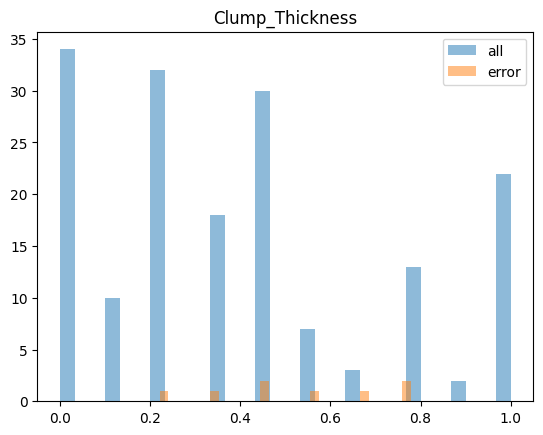

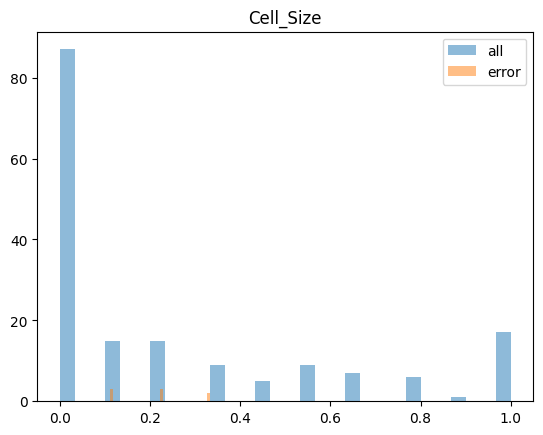

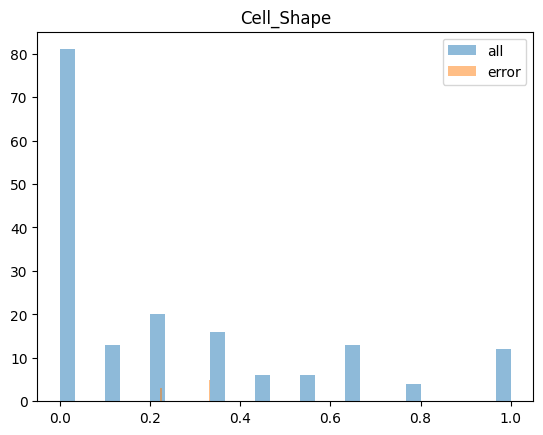

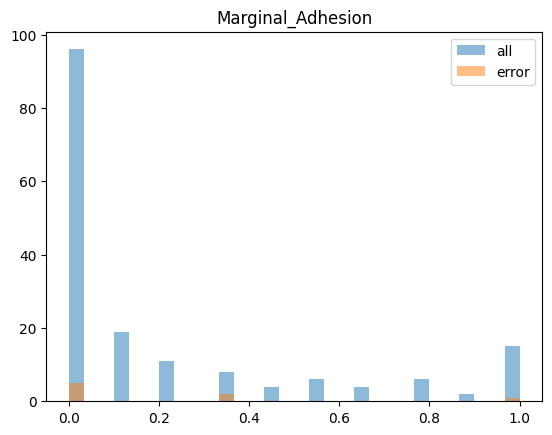

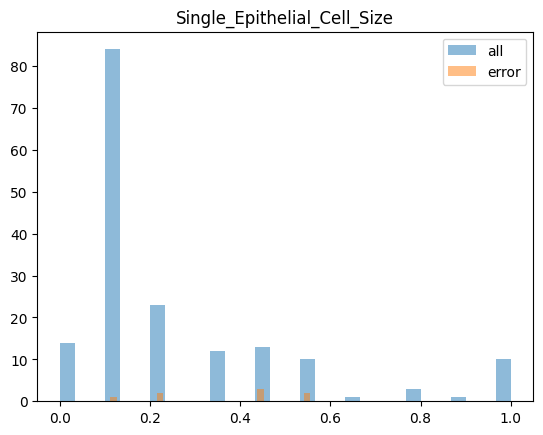

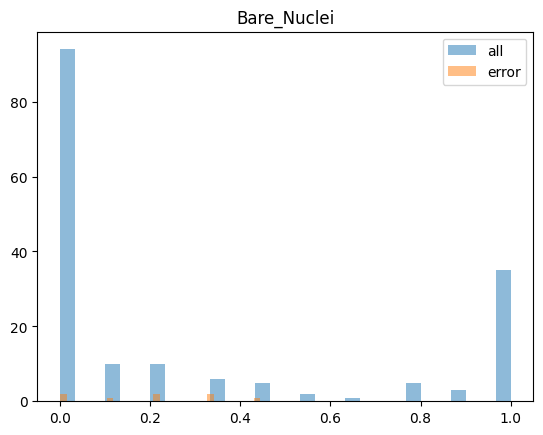

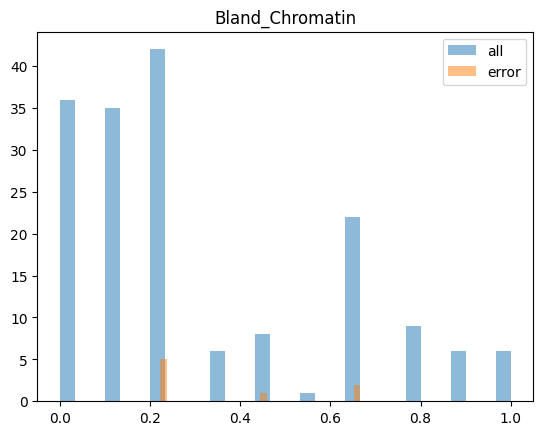

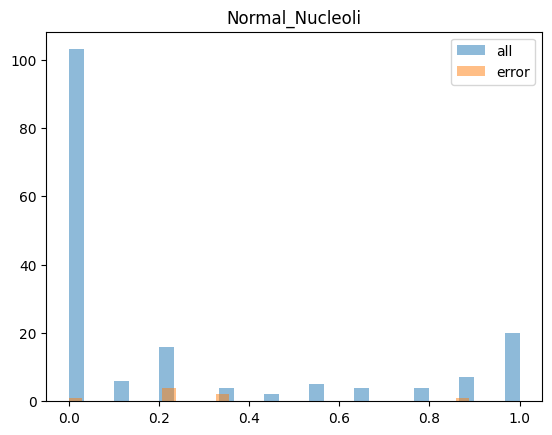

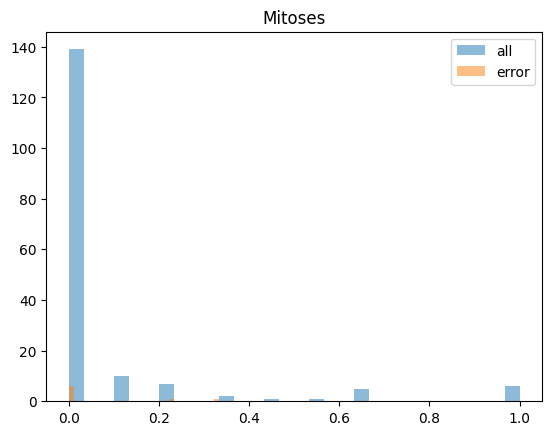

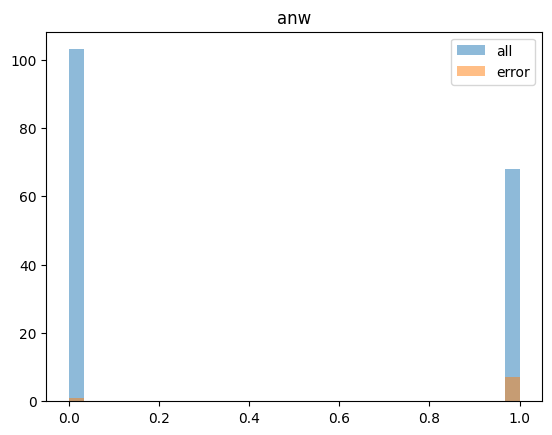

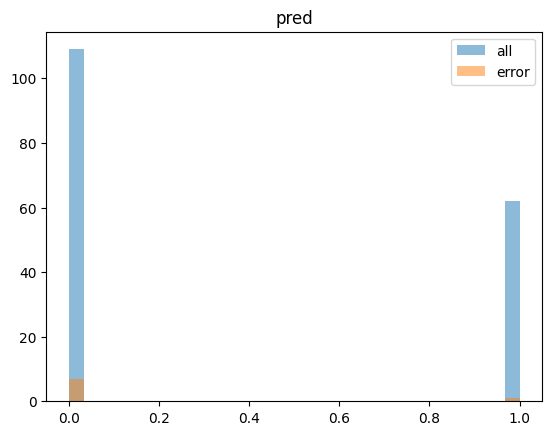

In [ ]:
import matplotlib.pyplot as plt

for i in range(0, len(df.columns)):
  col = df.columns[i]
  plt.title(col)
  plt.hist(df[col], bins=30, alpha = 0.5, label='all')
  plt.hist(df_error[col], bins=30, alpha = 0.5, label='error')
  plt.legend()
  plt.show()

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
#넣을 후보들
param_grid={"criterion":["gini", "entropy", "log_loss"], "max_depth":[2, 4, 8, 16]}
# 모델
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_scaled_minmax_train, y_train)

In [ ]:
#약한 학습기 3개로 강한 학습기 1개만듬, 투표방식 :하드보팅
#앙상블 과정
#하드 보팅
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

logit_model= LogisticRegression(random_state=42)
rnf_model = RandomForestClassifier(random_state=42)
svm_model = SVC()

model = VotingClassifier(
    estimators=[('lr', logit_model), ('rf', rnf_model), ('svc', svm_model)], voting='hard')
model.fit(X_scaled_minmax_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC())])

In [ ]:
import numpy as np
import pandas as pd

pred_test = model.predict(X_scaled_minmax_test)
df = pd.DataFrame(X_scaled_minmax_test, columns=data.columns[1:-1])
df['anw'] = np.array(y_test)
df['pred'] = pred_test
df_error = df[df['anw'] != df['pred']]

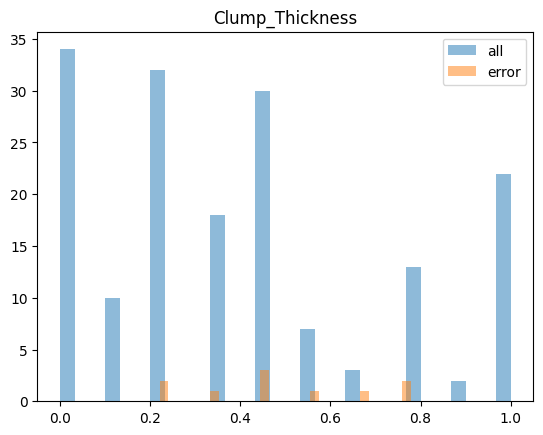

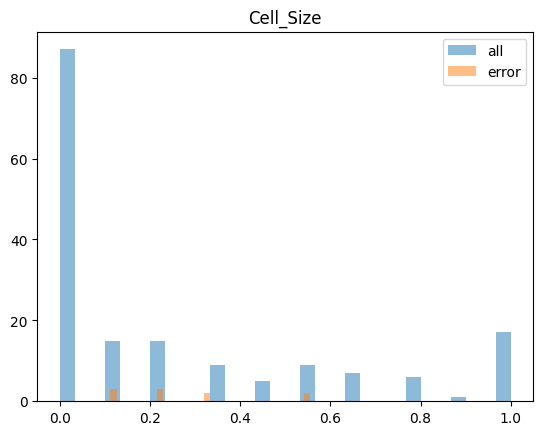

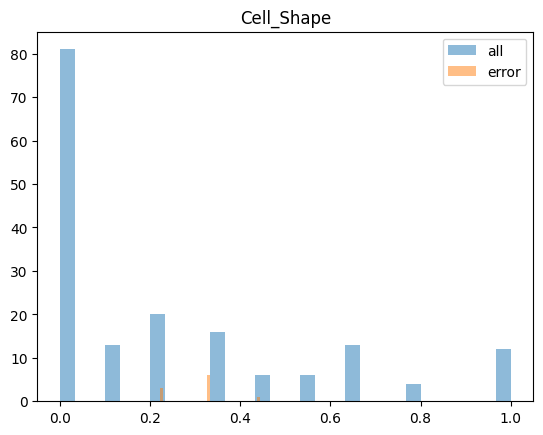

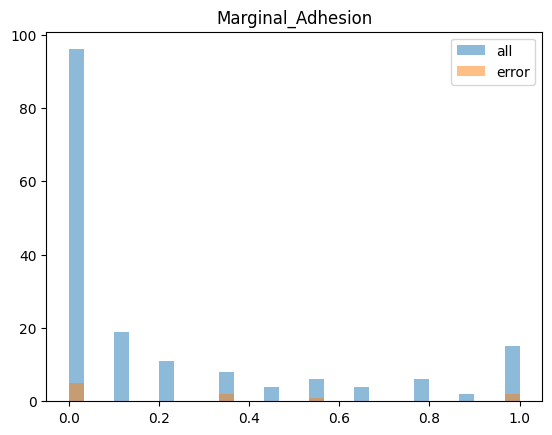

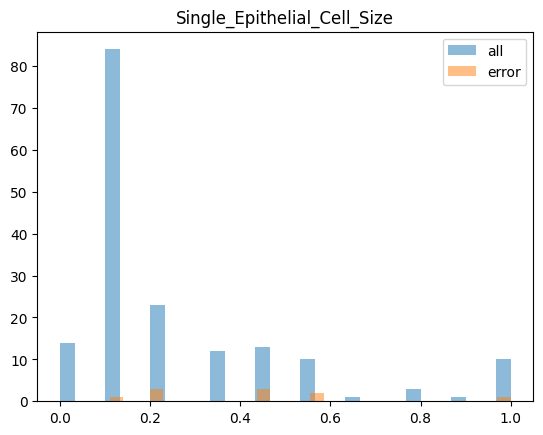

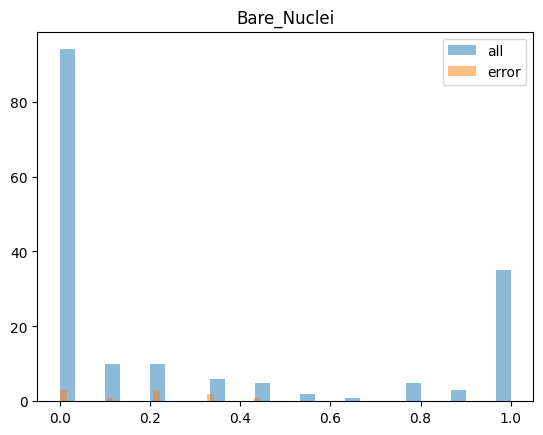

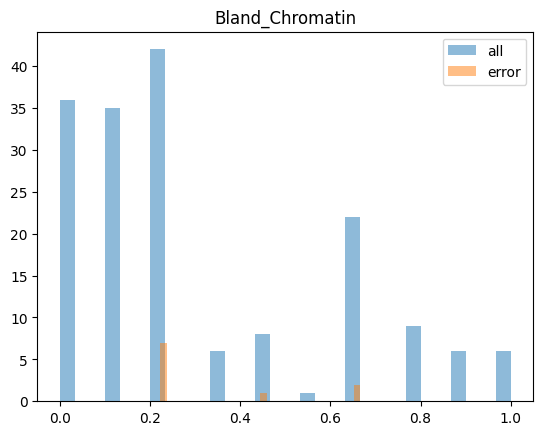

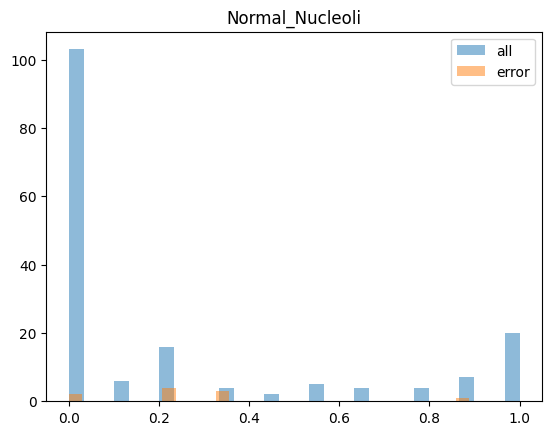

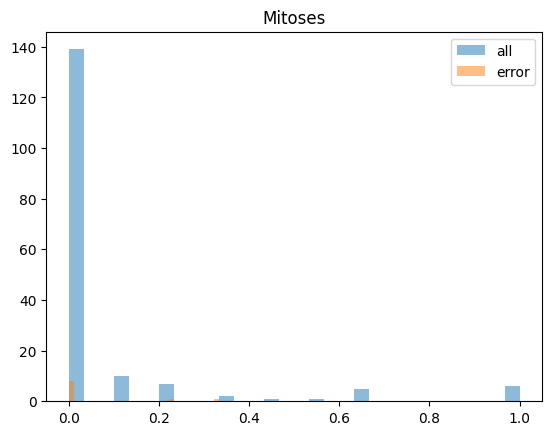

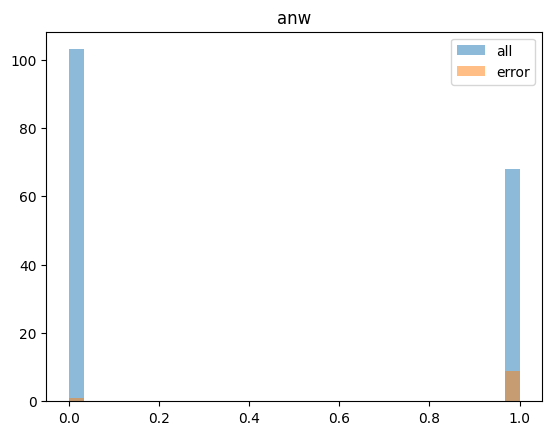

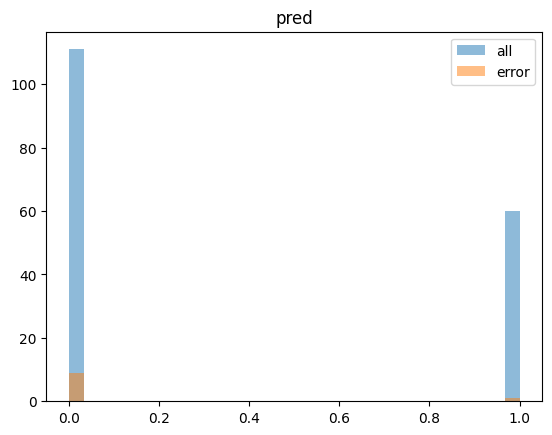

In [ ]:
import matplotlib.pyplot as plt

for i in range(0, len(df.columns)):
  col = df.columns[i]
  plt.title(col)
  plt.hist(df[col], bins=30, alpha = 0.5, label='all')
  plt.hist(df_error[col], bins=30, alpha = 0.5, label='error')
  plt.legend()
  plt.show()